In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('cluster_two_blobs.csv')

In [4]:
df.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [5]:
df_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

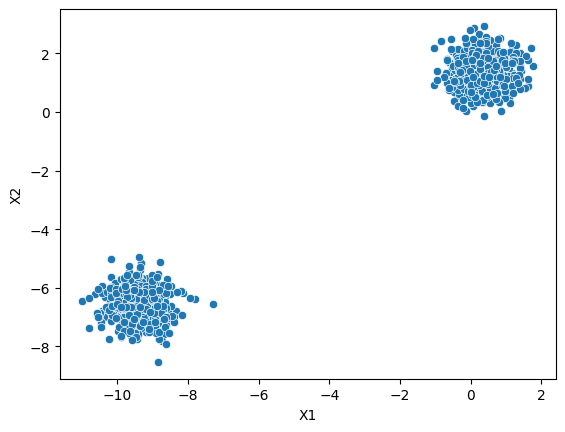

In [6]:
sns.scatterplot(data = df , x ='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

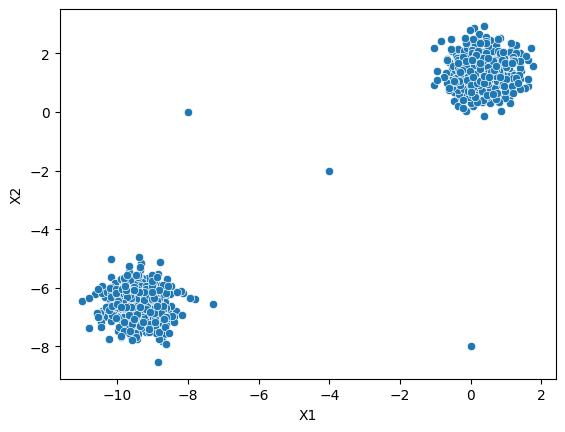

In [7]:
sns.scatterplot(data = df_outliers , x ='X1',y='X2')

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
dbscan = DBSCAN()

In [14]:
def display(model , data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data , x ='X1',y='X2' ,hue = labels , palette='Set1')

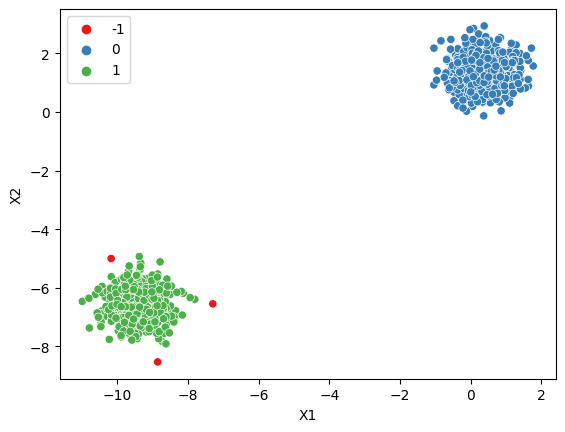

In [15]:
display(dbscan , df)

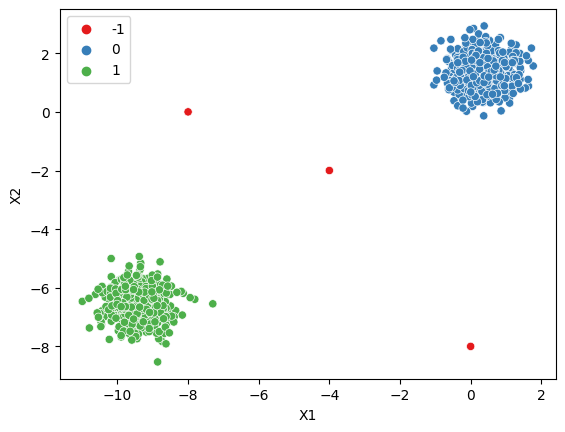

In [27]:
dbscan_1 = DBSCAN(eps=1)
display(dbscan_1, df_outliers )

In [31]:
# total no. of outliers found
np.sum(dbscan_1.labels_ == -1)


3

In [53]:
labels

NameError: name 'labels' is not defined

In [32]:
# percentage of outliers
100 * np.sum(dbscan_1.labels_ == -1) / len(dbscan_1.labels_)

0.29910269192422734

In [39]:
outliers_percent = []
num_of_outliers = []

for eps in np.linspace(0.001,10,100):
    dbscan_loop = DBSCAN(eps = eps)
    dbscan_loop.fit(df_outliers)
    
    # Total outliers
    num_of_outliers.append(np.sum(dbscan_loop.labels_ == -1))
    
    # percent of outliers
    outliers_percent.append(100 * np.sum(dbscan_loop.labels_ == -1) / len(dbscan_1.labels_))

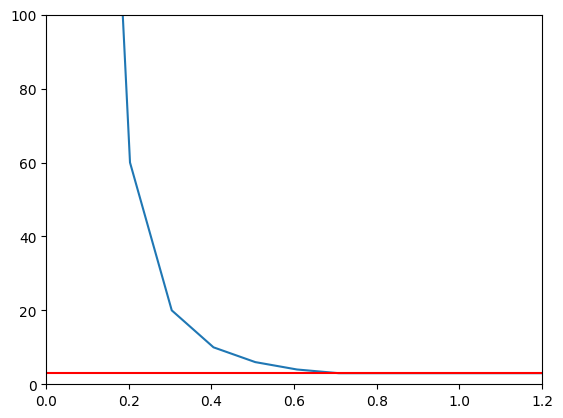

In [52]:
sns.lineplot(x = np.linspace(0.001 , 10,100) , y = num_of_outliers)
plt.xlim(0,1.2)
plt.ylim(0,100)
plt.hlines(y = 3 ,xmin=0, xmax= 2, colors='red')

from figure we see that for no. of outliers = 3 (i.e. y =3) , min value of x is 0.7 (eps => 0.7)

### Let's check

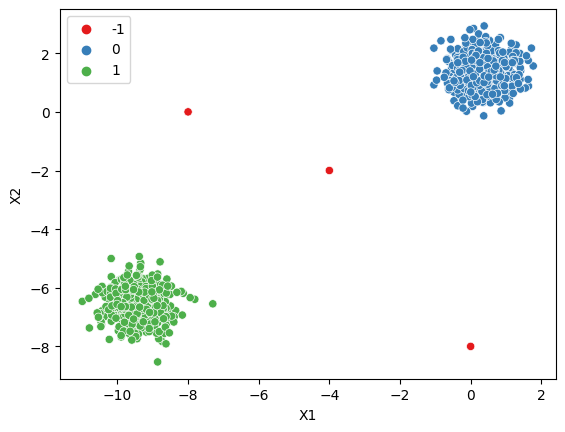

In [50]:
dbscan_1 = DBSCAN(eps=0.7)
display(dbscan_1, df_outliers )